<h1 id="tocheading">Проект: исследование игровой индустрии</h1>
<div id="toc"></div>

## Цель проекта
Выявить характеристики игр, которые делают их успешными для того, чтобы сделать ставку на потенциально успешный продукт и спланировать рекламные кампании магазина по продаже компьютерных игр. 

### План работы:
[ 1. Импортировать все нужные библиотеки и датасет. Изучить всю общую информацию о датасете.](#step1)

[ 2. Подготовить данные к анализу. Проверить на наличие пропусков. Объясннить логику исправления найденных ошибок.](#step2)


[ 3. Провести исследовательского анализа данных](#step3)


[ 4. Составить портрет пользователя каждого региона](#step4)

[ 5. Проверка гипотез](#step5)

[ 6. Общий вывод](#step6)

## <a id="step1">1. Импорт нужных библиотек и датасета. Изучить всю общую информацию о датасете.</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from math import factorial
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None) 

data = pd.read_csv('/datasets/games.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## <a id="step2"> 2.  Подготовка данных к анализу</a>

In [3]:
# приводим названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [4]:
# нужно привести столбец выпуска игры к целочисленному типу
# т.к там присутстуют пустые значения, мы вынуждены удалить их, чтобы привести к желаемому типу
# к тому же их всего 269
data.dropna(subset = ['year_of_release'], inplace = True)

In [5]:
# приводим год к целочисленному типу
data['year_of_release'] = data['year_of_release'].astype('int')

In [6]:
# изучаем пропущенные значения в столбцах датафрейма
data[['critic_score','user_score', 'rating']].isna().sum()

critic_score    8463
user_score      6607
rating          6678
dtype: int64

In [7]:
data.query('user_score == "tbd"').count()

name               2376
platform           2376
year_of_release    2376
genre              2376
na_sales           2376
eu_sales           2376
jp_sales           2376
other_sales        2376
critic_score       1056
user_score         2376
rating             2326
dtype: int64

1. При проверке столбца с рейтингом пользователей обнаружил большое количество(2376) значений tbd('to be determined'). Это значение обозначает, что недостаточное количество пользователей дало свою оценку игре. Потому рейтинг не отображается. По сути оно равносильно пропущенному значению. 
2. Также мы можем обнаружить практически столько же пропусков в рейтингах критиков. Практически всегда отсутствующие значения в двух колонках присутствуют вместе. Можно предположить, что критики могут давать свой рейтинг только играм с рейтингом пользователей. Поэтому в тех играх, где отсутствует рейтинг игроков, рейтинг критиков тоже отсутсвтует. Либо просто они принадлежат к одной таблице рейтингов, как и столбец с возрастной рейтинг, поэтому при их выгрузке возникли проблемы.
3. Значение tbd не играет значительной роли, поэтому мы приведем столбец user_score к числовым значениям float. Таким образом, все tbd станут nan и мы сможем работать с ними как с обычными пропущенными значениями.
4. Также приведем к численному типу float столбец rating, определяющий возрастную категорию игры.

In [8]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')
#data['rating'] = pd.to_numeric(data['rating'], errors = 'coerce')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [10]:
# посмотрим описательные статистики user_score
print("Медиана user_score",data['user_score'].median())
data['user_score'].describe()

Медиана user_score 7.5


count   7,463.00
mean        7.13
std         1.50
min         0.00
25%         6.40
50%         7.50
75%         8.20
max         9.70
Name: user_score, dtype: float64

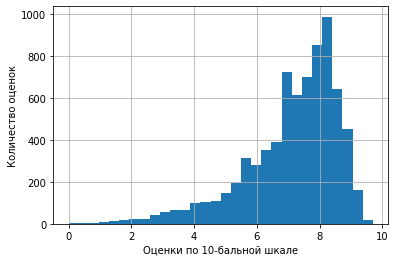

In [11]:
data['user_score'].hist(bins = 30)
plt.xlabel('Оценки по 10-бальной шкале')
plt.ylabel('Количество оценок')
plt.show()

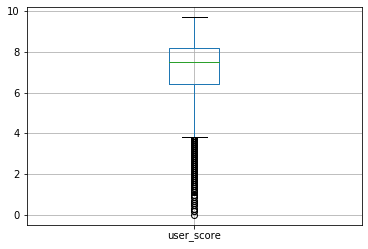

In [12]:
data.boxplot(column = 'user_score')
plt.show()

In [13]:
# посмотрим описательные статистики critic_score
print("Медиана critic_score",data['critic_score'].median())
data['critic_score'].describe()

Медиана critic_score 71.0


count   7,983.00
mean       68.99
std        13.92
min        13.00
25%        60.00
50%        71.00
75%        79.00
max        98.00
Name: critic_score, dtype: float64

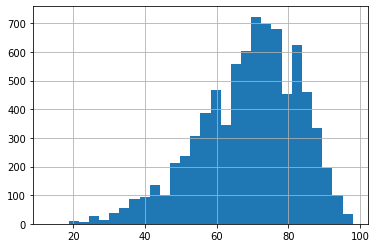

In [14]:
data['critic_score'].hist(bins=30)
plt.show()

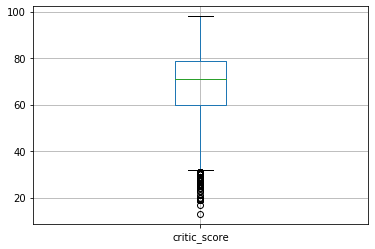

In [15]:
data.boxplot(column = 'critic_score')
plt.show()

Как можем видеть из гистограмм рейтингов критиков и рейтингов юзеров, значения более скучены возле крупных значений. Соответственно гистограмма скошена вправо, а ее хвост влево. Для заполнения пустых значений мы будем использовать медиану. Она лучше отображает то, как распределены данные.

При заполнении пропусков мы будем использовать не просто медиану, а медиану той категории игр, к которой принадлежит наше пропущенное значение. Каждое наблюдение/кейс, в нашем случае игра, принадлежит к более конкретной категории игр, которую мы определяем в соответствии с характеристиками этой категории. Важной характеристикой игры, которая определяет её категорию является жанр. Соответственно мы будем заполнять пропущенные значения каждой игры при помощи медианы жанра, к которому данная игра принадлежиит.

In [16]:
user_score_median = data.pivot_table(index = ['genre'], values = 'user_score', aggfunc= np.median )

In [17]:
user_score_median.columns = ['median_score'] 

In [18]:
for genre in user_score_median.index:
    data.loc[(data['user_score'].isna()) &
            (data['genre'] == genre),
            'user_score'] = user_score_median.loc[genre, 'median_score']
    

In [19]:
critic_score_median = data.pivot_table(index = ['genre'], values = 'critic_score', aggfunc= np.median )

In [20]:
critic_score_median.columns = ['median_score']

In [21]:
for genre in critic_score_median.index:
    data.loc[(data['critic_score'].isna()) &
            (data['genre'] == genre),
            'critic_score'] = critic_score_median.loc[genre, 'median_score']   

In [22]:
data['rating'].isna().sum()

6678

In [23]:
# Отсутсвующих значений в возрастном рейтинге до
# Заменяем отсутсвующие значения на RP - рейтинг ожидает своего подтверждения. 
data['rating'].fillna("RP", inplace = True)

In [24]:
# создаем отдельный столбец с суммарной продажей во всех регионах
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
rating             16446 non-null object
total_sales        16446 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


## <a id="step3">3. Исследовательский анализ данных.</a>

Проверим количество игр, выпускаемых за все годы

#### Сколько игр выпускалось в разные годы

In [26]:
games_per_year = data['year_of_release'].value_counts().sort_values()

In [27]:
games_per_year

1980       9
1985      14
1984      14
1988      15
1990      16
1987      16
1989      17
1983      17
1986      21
1982      36
1991      41
1992      43
1981      46
1993      62
1994     121
1995     219
1996     263
1997     289
1999     338
2000     350
1998     379
2001     482
2016     502
2013     544
2014     581
2015     606
2012     653
2004     762
2003     775
2002     829
2005     939
2006    1006
2011    1136
2007    1197
2010    1255
2009    1426
2008    1427
Name: year_of_release, dtype: int64

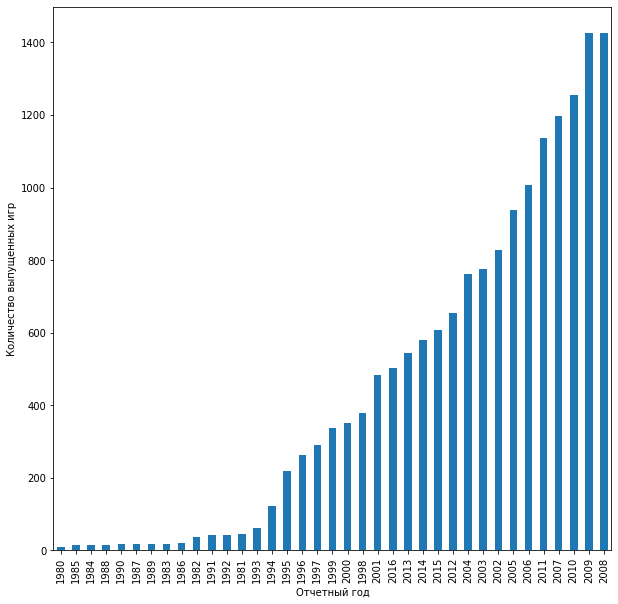

In [28]:
games_per_year.plot(figsize = (10,10), kind = 'bar')
plt.title = ('Количество игр в год')
plt.xlabel('Отчетный год')
plt.ylabel("Количество выпущенных игр")
plt.show()

In [29]:
# Во определённых годах производители выпускали небольшое количество игр. Уберем года, где количество игр не доходит до 100
# Значительный зазор между 1994 и 1995 помог сделать нам наш выбор
# в итоге убрали значения с 1982 по 1994 год
data = data.query('year_of_release > 1994') 

In [30]:
sales_year_platform = data.pivot_table(index = 'year_of_release', values = 'total_sales', columns = 'platform', aggfunc = 'sum' )

In [31]:
sales_year_platform.head()

platform,3DO,3DS,DC,DS,GB,GBA,GC,N64,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,
1995,0.08,nan,nan,nan,3.60,nan,nan,nan,0.33,4.22,nan,35.96,nan,nan,nan,nan,nan,11.57,32.20,0.16,nan,nan,nan,nan,nan,nan
1996,nan,nan,nan,nan,36.03,nan,nan,34.10,0.10,10.58,0.03,94.70,nan,nan,nan,nan,nan,7.69,15.92,nan,nan,nan,nan,nan,nan,nan
1997,nan,nan,nan,nan,6.37,nan,nan,39.50,nan,11.27,nan,136.17,nan,nan,nan,nan,nan,6.77,0.99,nan,nan,nan,nan,nan,nan,nan
1998,nan,nan,3.38,nan,26.90,nan,nan,49.24,nan,3.26,nan,169.49,nan,nan,nan,nan,nan,3.82,0.22,nan,nan,nan,nan,nan,nan,nan
1999,nan,nan,5.16,nan,38.00,nan,nan,57.87,nan,4.74,nan,144.53,nan,nan,nan,nan,nan,0.09,0.26,nan,0.46,nan,nan,nan,nan,nan


#### Изменение динамики продаж по платформам

In [32]:
# создаем столбец с общим количеством продаж за каждый год 
sales_year_platform['total_sales_yearly']= sales_year_platform.sum(axis=1)

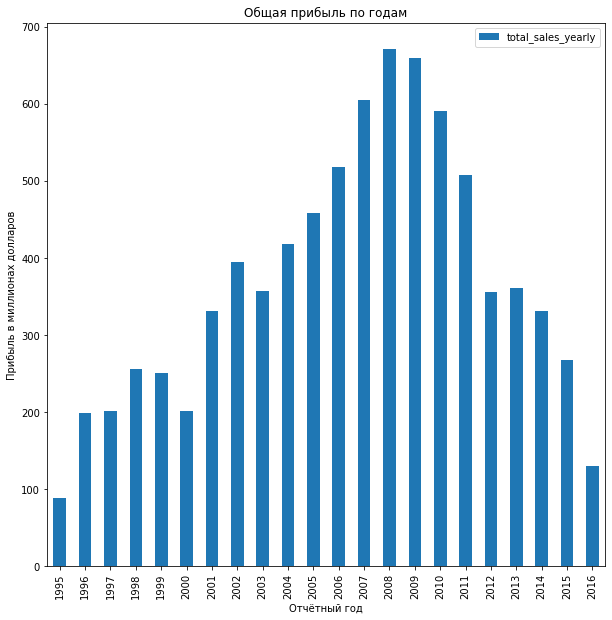

In [33]:
# посмотрим на гистограмме как распределились общие продажи по годам
# распределение колоколообразное, с небольшим сдвигом вправо, т.к в 1990х индустрия еще только набирала ход 
# пик прибыли пришелся на 2006-2010 годы (2008 - самый прибыльный) 
sales_year_platform.plot(y='total_sales_yearly', use_index=True, figsize = (10,10), kind ='bar', title ="Общая прибыль по годам")
plt.xlabel("Отчётный год")
plt.ylabel("Прибыль в миллионах долларов")
plt.show()

In [34]:
sales_year_platform = sales_year_platform.drop(columns = 'total_sales_yearly', axis = 1)

In [35]:
# создаем строку с общим количеством продаж по платформе
sales_year_platform.loc['total_sales_platform'] = sales_year_platform.sum()

In [36]:
sales_year_platform

platform,3DO,3DS,DC,DS,GB,GBA,GC,N64,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,
1995,0.08,nan,nan,nan,3.60,nan,nan,nan,0.33,4.22,nan,35.96,nan,nan,nan,nan,nan,11.57,32.20,0.16,nan,nan,nan,nan,nan,nan
1996,nan,nan,nan,nan,36.03,nan,nan,34.10,0.10,10.58,0.03,94.70,nan,nan,nan,nan,nan,7.69,15.92,nan,nan,nan,nan,nan,nan,nan
1997,nan,nan,nan,nan,6.37,nan,nan,39.50,nan,11.27,nan,136.17,nan,nan,nan,nan,nan,6.77,0.99,nan,nan,nan,nan,nan,nan,nan
1998,nan,nan,3.38,nan,26.90,nan,nan,49.24,nan,3.26,nan,169.49,nan,nan,nan,nan,nan,3.82,0.22,nan,nan,nan,nan,nan,nan,nan
1999,nan,nan,5.16,nan,38.00,nan,nan,57.87,nan,4.74,nan,144.53,nan,nan,nan,nan,nan,0.09,0.26,nan,0.46,nan,nan,nan,nan,nan
2000,nan,nan,5.99,nan,19.76,0.07,nan,33.97,nan,4.66,nan,96.37,39.17,nan,nan,nan,nan,nan,nan,nan,0.68,nan,nan,nan,0.99,nan
2001,nan,nan,1.07,nan,9.24,61.53,26.34,3.25,nan,5.47,nan,35.59,166.43,nan,nan,nan,nan,nan,nan,nan,0.28,nan,nan,nan,22.26,nan
2002,nan,nan,0.29,nan,nan,74.16,51.81,0.08,nan,8.57,nan,6.67,205.38,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,48.01,nan
2003,nan,nan,nan,nan,nan,56.67,50.61,nan,nan,8.84,nan,2.07,184.31,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,55.04,nan


In [37]:
# сортируем по убыванию самые прибыльные платформы
arranged_platforms = sales_year_platform.sort_values(by= 'total_sales_platform', ascending=False, axis=1)

In [38]:
arranged_platforms

platform,PS2,X360,PS3,Wii,DS,PS,PS4,GBA,PSP,3DS,XB,PC,N64,GC,XOne,GB,WiiU,PSV,SNES,SAT,DC,WS,NG,TG16,3DO,PCFX
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,
1995,nan,nan,nan,nan,nan,35.96,nan,nan,nan,nan,nan,4.22,nan,nan,nan,3.60,nan,nan,32.20,11.57,nan,nan,0.33,0.16,0.08,nan
1996,nan,nan,nan,nan,nan,94.70,nan,nan,nan,nan,nan,10.58,34.10,nan,nan,36.03,nan,nan,15.92,7.69,nan,nan,0.10,nan,nan,0.03
1997,nan,nan,nan,nan,nan,136.17,nan,nan,nan,nan,nan,11.27,39.50,nan,nan,6.37,nan,nan,0.99,6.77,nan,nan,nan,nan,nan,nan
1998,nan,nan,nan,nan,nan,169.49,nan,nan,nan,nan,nan,3.26,49.24,nan,nan,26.90,nan,nan,0.22,3.82,3.38,nan,nan,nan,nan,nan
1999,nan,nan,nan,nan,nan,144.53,nan,nan,nan,nan,nan,4.74,57.87,nan,nan,38.00,nan,nan,0.26,0.09,5.16,0.46,nan,nan,nan,nan
2000,39.17,nan,nan,nan,nan,96.37,nan,0.07,nan,nan,0.99,4.66,33.97,nan,nan,19.76,nan,nan,nan,nan,5.99,0.68,nan,nan,nan,nan
2001,166.43,nan,nan,nan,nan,35.59,nan,61.53,nan,nan,22.26,5.47,3.25,26.34,nan,9.24,nan,nan,nan,nan,1.07,0.28,nan,nan,nan,nan
2002,205.38,nan,nan,nan,nan,6.67,nan,74.16,nan,nan,48.01,8.57,0.08,51.81,nan,nan,nan,nan,nan,nan,0.29,nan,nan,nan,nan,nan
2003,184.31,nan,nan,nan,nan,2.07,nan,56.67,nan,nan,55.04,8.84,nan,50.61,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [39]:
# создаем отдельную таблицу для наиболее успешных игровых платформ
top_sales = arranged_platforms.iloc[:, 0:6]

In [40]:
top_sales

platform,PS2,X360,PS3,Wii,DS,PS
year_of_release,,,,,,
1995,nan,nan,nan,nan,nan,35.96
1996,nan,nan,nan,nan,nan,94.70
1997,nan,nan,nan,nan,nan,136.17
1998,nan,nan,nan,nan,nan,169.49
1999,nan,nan,nan,nan,nan,144.53
2000,39.17,nan,nan,nan,nan,96.37
2001,166.43,nan,nan,nan,nan,35.59
2002,205.38,nan,nan,nan,nan,6.67
2003,184.31,nan,nan,nan,nan,2.07


In [41]:
top_sales = top_sales.drop(index = 'total_sales_platform', axis = 0)

In [42]:
top_sales.fillna(0)

platform,PS2,X360,PS3,Wii,DS,PS
year_of_release,,,,,,
1995,0.00,0.00,0.00,0.00,0.00,35.96
1996,0.00,0.00,0.00,0.00,0.00,94.70
1997,0.00,0.00,0.00,0.00,0.00,136.17
1998,0.00,0.00,0.00,0.00,0.00,169.49
1999,0.00,0.00,0.00,0.00,0.00,144.53
2000,39.17,0.00,0.00,0.00,0.00,96.37
2001,166.43,0.00,0.00,0.00,0.00,35.59
2002,205.38,0.00,0.00,0.00,0.00,6.67
2003,184.31,0.00,0.00,0.00,0.00,2.07


In [43]:
import matplotlib.ticker as ticker

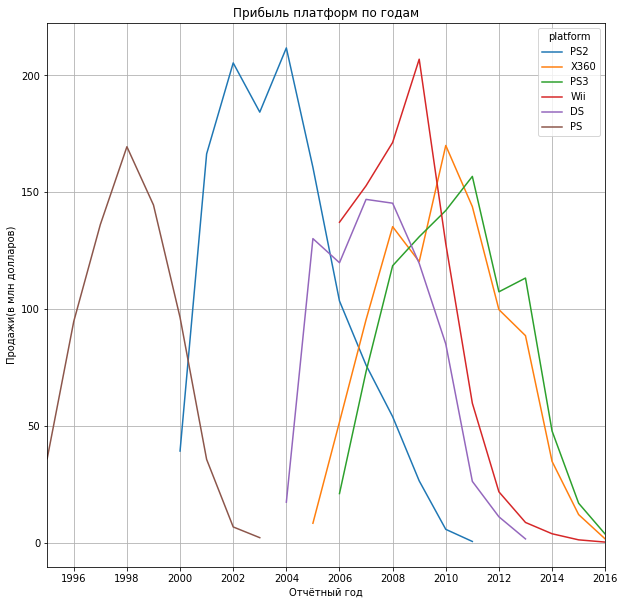

In [44]:
fig, ax = plt.subplots()
top_sales.plot(figsize = (10,10), grid=True, ax=ax, title = "Прибыль платформ по годам")
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.xlabel("Отчётный год")
plt.ylabel("Продажи(в млн долларов)")
plt.show()

Как мы можем видеть из таблицы, жизненный цикл платформы составляет примерно 8-10 лет. В период падения продаж мы можем замечать как альтернативная платфаорма начинает свой рост и закрывает существующую потребность пользователей.

#### Актуальный период и прогноз на 2017 год

Актуальный период в нашем случае начинается примерно в 2013-2014 году. Мы можем заметить, что к этому времени PS3 и X360 уже практически полностью пришли в упадок, в то время как PS4 начинает расти. 

In [45]:
sales_year_platform_nosales = sales_year_platform.drop(index = 'total_sales_platform', axis = 0)

In [46]:
actual_period_data = sales_year_platform_nosales.query('year_of_release > 2013')

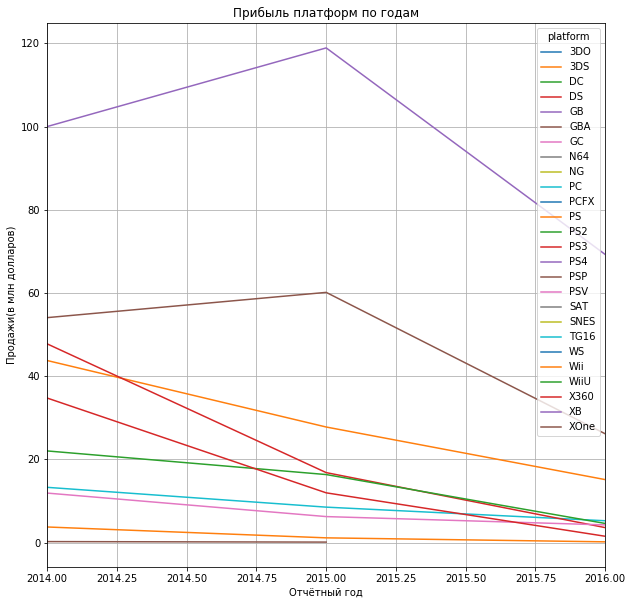

In [47]:
actual_period_data.plot(figsize = (10,10), grid=True, title = "Прибыль платформ по годам")
#ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xlabel("Отчётный год")
plt.ylabel("Продажи(в млн долларов)")
plt.show()

При попыптке сделать прогноз на 2017, опираясь на предшествующий анализ, мы можем предположить, что наиболее акутуальным платформами, которые еще не исчерпали свой ресурс и не прошли свой жизненный цикл, соответственно не исчерпали возможность генерировать прибыль являются PS4 и XOne. PC также перспективен, т.к будет продолжать генерировать умеренную прибыль.
В тоже время PS3 и X360, который были очень прибыльными в предыдущий период, ушли в упадок.

In [48]:
global_sales_per_platform = actual_period_data.query('year_of_release > 2013') 

In [49]:
global_sales_per_platform

platform,3DO,3DS,DC,DS,GB,GBA,GC,N64,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,
2014,nan,43.76,nan,nan,nan,nan,nan,nan,nan,13.28,nan,nan,nan,47.76,100.00,0.24,11.90,nan,nan,nan,nan,3.75,22.03,34.74,nan,54.07
2015,nan,27.78,nan,nan,nan,nan,nan,nan,nan,8.52,nan,nan,nan,16.82,118.90,0.12,6.25,nan,nan,nan,nan,1.14,16.35,11.96,nan,60.14
2016,nan,15.14,nan,nan,nan,nan,nan,nan,nan,5.25,nan,nan,nan,3.60,69.25,nan,4.25,nan,nan,nan,nan,0.18,4.60,1.52,nan,26.15


In [50]:
# шесть топовых платформ из прошлого цикла и те, что показывают рост в новый период
global_sales_relevant_platforms = global_sales_per_platform[['PS2','X360','PS3','Wii','DS','PS','3DS', 'PS4', 'XOne', 'PC']]

In [104]:
global_sales_relevant_platforms

platform,PS2,X360,PS3,Wii,DS,PS,3DS,PS4,XOne,PC
year_of_release,,,,,,,,,,
2014,nan,34.74,47.76,3.75,nan,nan,43.76,100.00,54.07,13.28
2015,nan,11.96,16.82,1.14,nan,nan,27.78,118.90,60.14,8.52
2016,nan,1.52,3.60,0.18,nan,nan,15.14,69.25,26.15,5.25


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


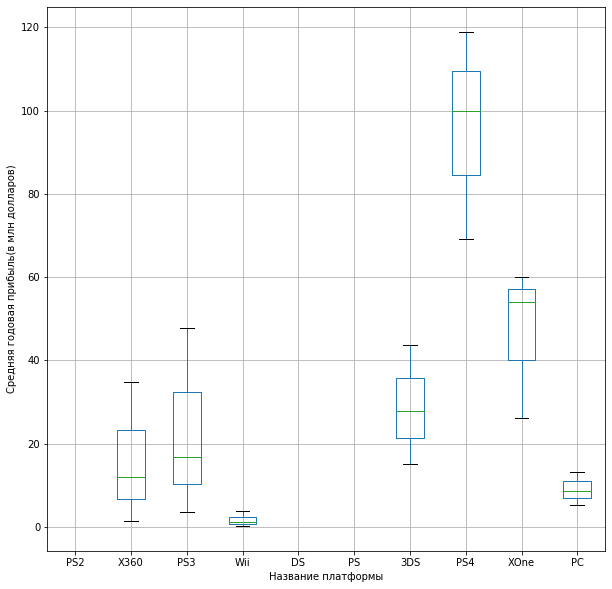

In [100]:
global_sales_relevant_platforms.boxplot(figsize = (10,10))
plt.xlabel("Название платформы")
plt.ylabel("Средняя годовая прибыль(в млн долларов)")
plt.show()

1. В актуальный наибольшие средние годовые прибыли у PS4 (80 млн), XOne(50 млн) и 3DS(30млн).
2. PC, X360, PS3 всё еще продолжают генерировать выручку, но очень умеренную (10-15млн). Wii - только 2-3 млн.


#### Продажи и рейтинги в популярной платформе 

In [52]:
popular_platform =  data.query('platform == "PS4" and year_of_release > 2013') 

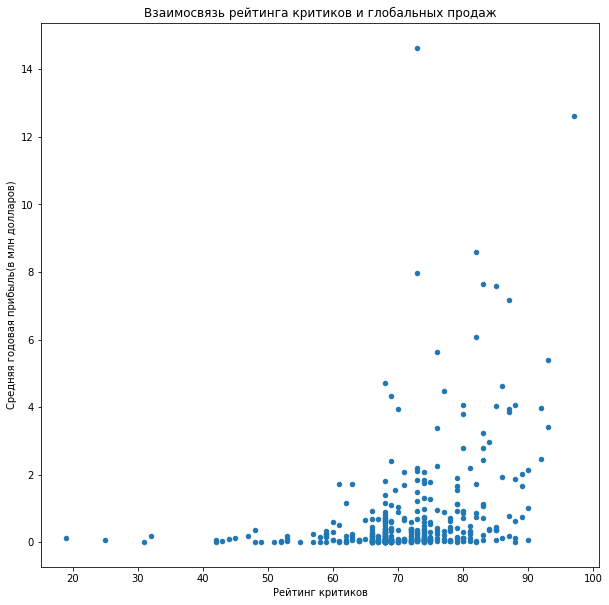

In [53]:
popular_platform.plot(x = "critic_score", y = 'total_sales', kind = 'scatter', figsize =(10,10), 
                      title = "Взаимосвязь рейтинга критиков и глобальных продаж")
plt.xlabel("Рейтинг критиков")
plt.ylabel("Средняя годовая прибыль(в млн долларов)")
plt.show()

In [54]:
print(popular_platform['critic_score'].corr(popular_platform['total_sales']))

0.346163551232677


Коффициент корреляции 0.34 говорит о слабой/умеренной связи между переменными. Как видно из диаграммы рассеяния взаимосвязь между двумя переменными проявляется нечётко до момента, пока рейтинг не достигает 60-70 пунктов и более заметна после этого рубежа. Изсходя из этого, можем предположить, что игры с высокой оценкой выше определенного порога сильнее взаимосвязаны с генерируемой прибылью. В то время как до этого порога связь между рейтингом и прибылью выражена менее заметно. 

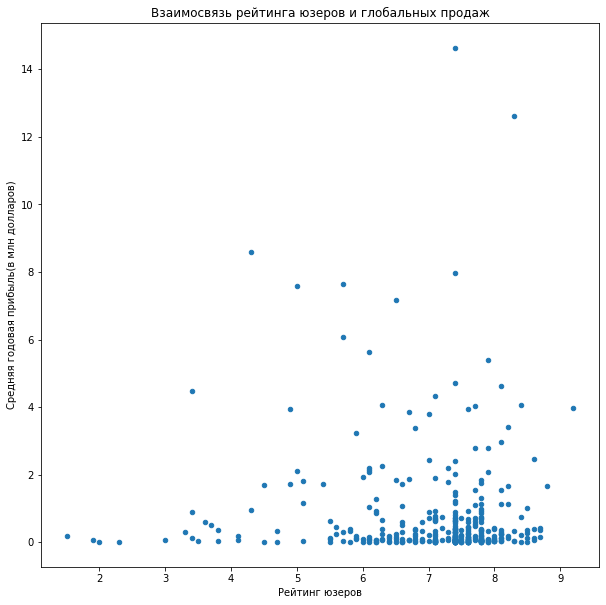

In [55]:
popular_platform.plot(x = 'user_score', y = 'total_sales', kind = "scatter", figsize = (10,10),
                     title = "Взаимосвязь рейтинга юзеров и глобальных продаж")
plt.xlabel("Рейтинг юзеров")
plt.ylabel("Средняя годовая прибыль(в млн долларов)")
plt.show()

In [56]:
print(popular_platform['user_score'].corr(data['total_sales']))

-0.06709467337892866


На диаграмме рассеяния можно заметить что взаимосвязь между рейтингом игроков и генерируемой прибылью несистемная и нет четко очерченной направленности как переменные между собой связаны. Это еще больше подтверждается низким коэффициентом корреляции (-0.06), который говорит о слабой негативной связи между прибылью и рейтингом игроков. Т.е при росте одной из переменных (например, рейтинга юзеров), вторая наоборот уменьшается. Соответственно игры с более высокими рейтингами юзеров склонны иметь меньшую прибыль, или наоборот, игры с низкими рейтингами склонны иметь более высокую прибыль.

По диаграммам рассеяния и проведению попарных тестов на корреляцию Пирсона, мы можем заключить, что между рейтингом критиков и прибылью от игры существует умеренная положительная связь. Но стоит заметить, что взаимосвязь не монотонна и больше проявляется на более высоких рейтингах. Это может говорить о том, что до определенного порога, низко оцененные игры приносят соизмеримую по значениям прибыль. А вот выше определенного порога связь между рейтингом и прибылью проявляется более явно.
Между рейтингом игроков и общим доходом существует слабая негативная связь. Это говорит о том, что увеличение или уменьшение рейтинга игроков слабо связано с увеличением или уменьшением прибыли игры. Т.е высоко оценненная игроками игра не всегда способна приносить высокий доход. И наоборот, не очень высоко оцененная игроками, но хорошо прорекламированная и грамотно проданная игра способна генерировать высокие доходы.

In [57]:
actual_period = data.query('year_of_release > 2013')

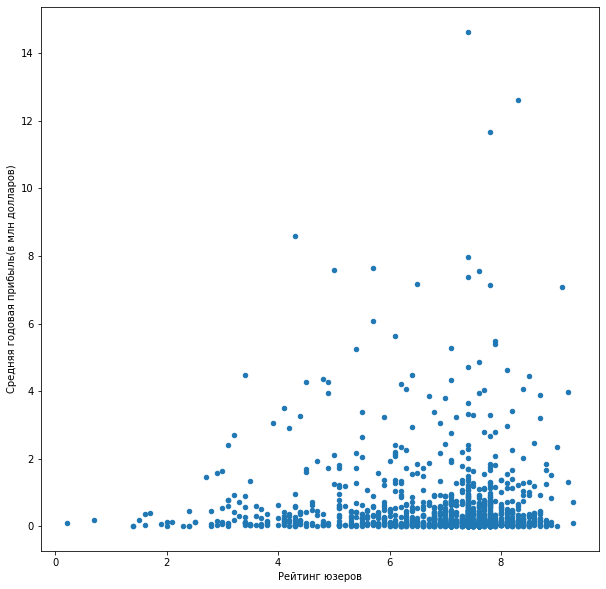

In [58]:
actual_period.plot( x = 'user_score', y = 'total_sales', kind = 'scatter', figsize = (10,10))
plt.xlabel("Рейтинг юзеров")
plt.ylabel("Средняя годовая прибыль(в млн долларов)")
plt.show()

In [59]:
print(actual_period['user_score'].corr(actual_period['total_sales']))

-0.06338538631746068


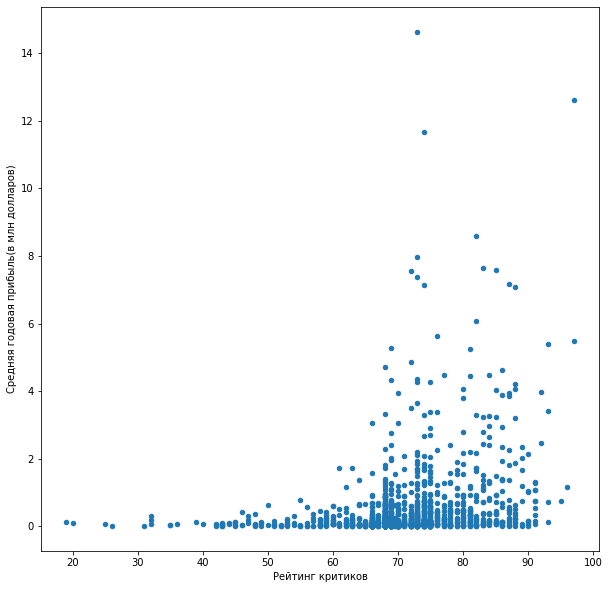

In [60]:
actual_period.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', figsize = (10,10))
plt.xlabel("Рейтинг критиков")
plt.ylabel("Средняя годовая прибыль(в млн долларов)")
plt.show()

In [61]:
print(actual_period['critic_score'].corr(actual_period['total_sales']))

0.28294760570986344


Если мы сравним выводы с другими платформами, то можем прийти к аналогичному заключению: очень слабая негативная, близкая к отсутствующей, связь между рейтингом юзеров и прибылью(-0.03) и умеренная положительная связь между рейтингом критиков и прибылью (0.28). Хотя в PS4 связь была более выражена, чем среди всех платформ, тренд во многом сохраняется. 



#### Жанры и их прибыль

In [62]:
actual_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.00,7.40,RP,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,74.00,7.80,RP,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,73.00,7.40,RP,7.98


In [63]:
# количество игр в жанре экшн определенно преобладает по количеству над другими жанрами
# пазлы наименее многочисленны
actual_period.genre.value_counts()

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

In [64]:
actual_period_genres = actual_period.pivot_table(index = 'genre', values = 'total_sales').sort_values( by = 'total_sales', ascending = False)

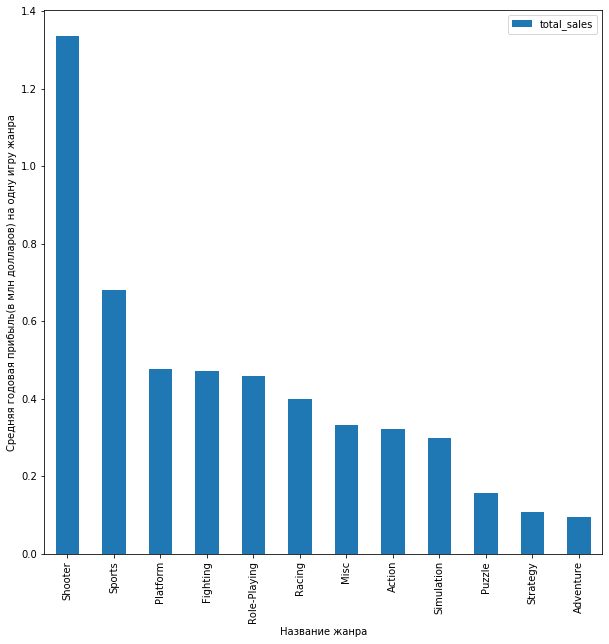

In [65]:
actual_period_genres.plot(kind = 'bar', figsize = (10,10))
plt.xlabel("Название жанра")
plt.ylabel("Средняя годовая прибыль(в млн долларов) на одну игру жанра")
plt.show()

Наиболее прибыльными являются шутеры и спортивный жанр. Каждая игра этих жанров в среднем приносит 1.34 и 0.68 млн USD каждый год. Наименее прибыльными являются стратегии и приключения (0.11 и 0.09 млн соответственно). 


## <a id="step4">4. Портрет пользователя каждого региона </a>

#### Популярные платформы по различным регионам

In [66]:
# группируем по самым популярным платформам в Северной Америке и определеяем долю от продаж по всем платформам
na_region = actual_period.groupby('platform')['na_sales'].sum() /actual_period['na_sales'].sum()

In [67]:
# группируем по самым популярным платформам в Евросоюзе и определеяем долю от продаж по всем платформам
eu_region = actual_period.groupby('platform')['eu_sales'].sum() / actual_period['eu_sales'].sum()

In [68]:
# группируем по самым популярным платформам в Японии и определеяем долю от продаж по всем платформам
jp_region = actual_period.groupby('platform')['jp_sales'].sum() / actual_period['jp_sales'].sum()

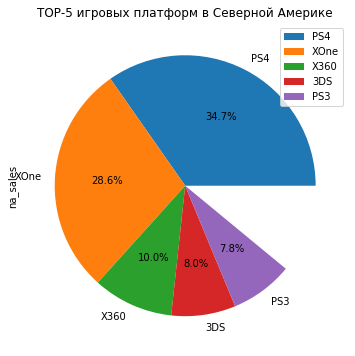

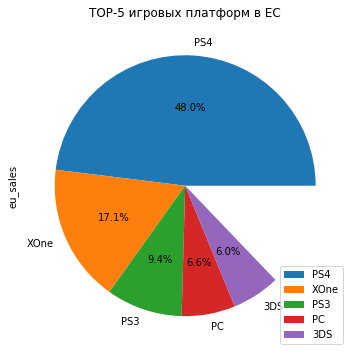

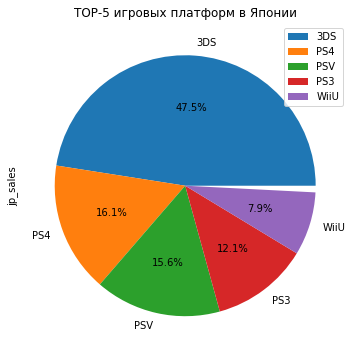

In [69]:
na_region.nlargest(5).plot(kind = 'pie', autopct = '%1.1f%%', legend = True, figsize = (10,6), 
                           title = "TOP-5 игровых платформ в Северной Америке")
plt.show()
eu_region.nlargest(5).plot(kind = 'pie', autopct = '%1.1f%%', legend = True, figsize = (10,6),
                          title = "TOP-5 игровых платформ в ЕС")
plt.show()
jp_region.nlargest(5).plot(kind = 'pie', autopct = '%1.1f%%', legend = True, figsize = (10,6),
                          title = "TOP-5 игровых платформ в Японии")
plt.show()

1. По долям продаж платформ ЕС и Америка достаточно похожи. Доминирует PS4, а следом идёт XOne. Только в ЕС  доля PS4 больше(48% VS 34%), а доля XOne соответвтенно меньше(17% VS 28%). Эти доминирующие платформы в обоих случаях составляют львиную долю от всего рынка. Третья в ЕС PS3 занимает в СА только 5-е место, а PC присутствует в пятёрке в ЕС и отсутствует в СА.
2. Платформы на Японском рынке значительно отличаются. На первом месте 3DS(47,5%), которая имеет соответственно 6% в ЕС и 8% в СА. Второе место занимает PS 4 c 16%, что значительно меньше чем её доминирующее положение в ЕС и СА. Третье место в Японии принадлежит PSV(15%), которая вообще отсутсвует в СА и ЕС.
3. Рынки ЕС и СА имеют больше обшего, как и политические и культурные связи между ЕС и СА. В то же время, Япония является более отличным регионом, который хотя также является демократией и рынком, как показывает наш анализ имеет свои предпочтения в игровой индустрии и отличается от Западных стран. 

#### Популярные жанры по различным регионам

In [70]:
#группируем по самым популярным платформам в Северной Америке и определеяем долю от общего количества платформ
na_region_genre = actual_period.groupby('genre')['na_sales'].sum() / actual_period['na_sales'].sum()

In [71]:
# группируем по самым популярным платформам в Евросоюзе и определеяем долю от общего количества платформ
eu_region_genre = actual_period.groupby('genre')['eu_sales'].sum() / actual_period['eu_sales'].sum()

In [72]:
# группируем по самым популярным платформам в Японии и определеяем долю от общего количества платформ
jp_region_genre = actual_period.groupby('genre')['jp_sales'].sum() / actual_period['jp_sales'].sum()

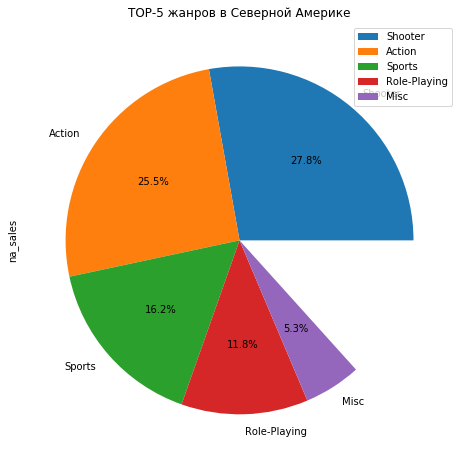

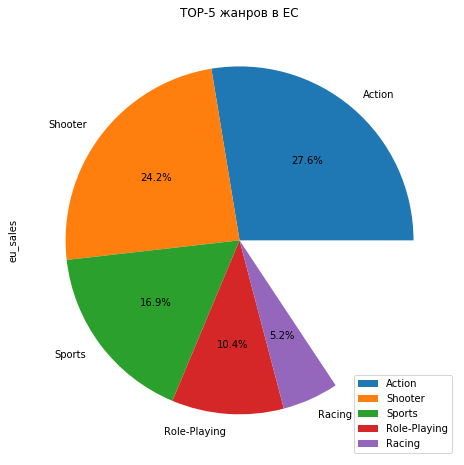

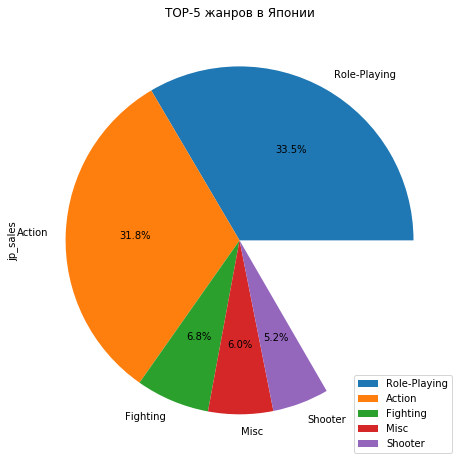

In [73]:
na_region_genre.nlargest(5).plot(kind = 'pie', autopct = '%1.1f%%', legend = True, figsize = (10,8),
                                title = "TOP-5 жанров в Северной Америке")
plt.show()
eu_region_genre.nlargest(5).plot(kind = 'pie', autopct = '%1.1f%%', legend = True, figsize = (10,8),
                                title = "TOP-5 жанров в ЕС")
plt.show()
jp_region_genre.nlargest(5).plot(kind = 'pie', autopct = '%1.1f%%', legend = True, figsize = (10,8),
                                title = "TOP-5 жанров в Японии")
plt.show()

1. Доля жанров на рынках СА и ЕС практически идентична. Причем не только в качественном отображении, когда одни и те же жанры наиболее популярны на двух рынках, но и количественно, где за исключением небольших отличий и количественная доля жанров очень похожа. Три доминирующих жанра - экшн, шутер и спорт, а role-playing  - 4-я. Единственное отличие -пятая позиция Misc в СА и racing в ЕС.
2. Японский рынок довольно ощутимо отличается от ЕС и СА. Первенство держит role-playing с 33%. На втором месте экшн, который доминирует в СА и ЕС. Шутер только пятый с 5%, в то время как в ЕС и СА он уверенно держит вторую позицию. Четвертое и пятое место занимают fighting и misc, которые либо вообще отсутствуют, либо на 5-й позиции в СА и ЕС.

#### ECBR рейтинг и продажи в регионах

In [74]:
eu_rating = actual_period.groupby('rating')['eu_sales'].sum() / actual_period['eu_sales'].sum()

In [75]:
na_rating = actual_period.groupby('rating')['na_sales'].sum() / actual_period['na_sales'].sum()

In [76]:
jp_rating = actual_period.groupby('rating')['jp_sales'].sum() / actual_period['jp_sales'].sum()

In [77]:
eu_rating 

rating
E      0.21
E10+   0.10
M      0.35
RP     0.22
T      0.13
Name: eu_sales, dtype: float64

In [78]:
na_rating

rating
E      0.18
E10+   0.12
M      0.34
RP     0.23
T      0.14
Name: na_sales, dtype: float64

In [79]:
jp_rating

rating
E      0.10
E10+   0.05
M      0.09
RP     0.61
T      0.16
Name: jp_sales, dtype: float64

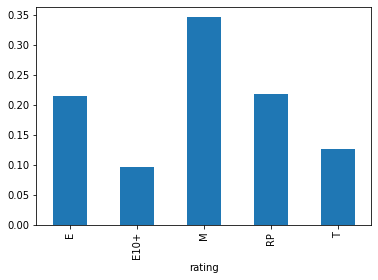

In [80]:
eu_rating.plot(kind = 'bar')
plt.show()

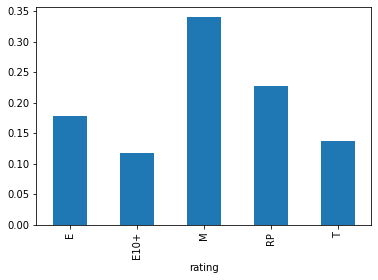

In [81]:
na_rating.plot(kind = 'bar')
plt.show()

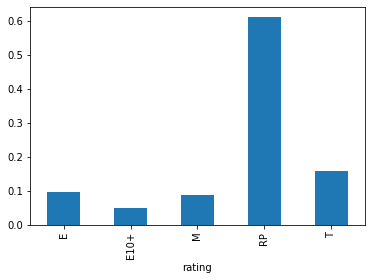

In [82]:
jp_rating.plot(kind = 'bar')
plt.show()

Снова мы наблюдаем большую схожесть между ЕС и СА и определенное отличе в Японии.  В ЕС и СА гораздо большую пропорцию по сравнению с Японией составляет контент М(Mature), который предназначен для лиц старше 17 лет(35% в ЕС, 34% -в СА, и только 9% - в Японии. 
В то время, как в Японии пропорционально наоборот больше продаж игр с рейтингом T(teen). Это говорит о том, что в СА и ЕС возрастная категория более взрослых потребителей гораздо больше, чем в Японии. В Японии же наоброт больше потребляется игр, ограниченных подростковой возратсной категорией. Селдует учитывать достаточно большое количество пропущенных значений в рейтингах игр в Японии, которое имело свое влияние на анализ этой категории.  

#### Краткий вывод

1. Как мы могли заметить пользователи разных регионов имеют разные предпочтения в компьютерных играх. 
2. Две доминирующие на рынке СА и ЕС платформы совпадают - это PS4 и XOne. Они занимают 77-78% рынка. В Японии же рынок распределен более равномерно между разными платформами: 3DS(33%), PS4(27%), WiiU(19%), PSV(13%).
3. TOP-5 жанров в СА и ЕС совпадают, в том числе очень похожа пропорция присутствия разных жанров на рынке: экшн, шутер, спорт, ролевые игры и гоночные симуляторы. В Японии на первом месте расположились ролевые игры, а экшн и шутер занимают второе и третье место соотвественно. 4-5 занимают отсутствующие в ЕС и СА жанры platform и simulation. 
4. Возрастные предпочтения по играм в ЕС и СА практически идентичны. А вот в Японии рынок предлагает больше игр для подростков(36%), в то время как в ЕС и СА больше игрового контента для лиц старше 17 лет (47%).
5. Таким образом, можно сказать что преобладащие игровые платформы, игровые жанры и возврастные категории на рынках ЕС и СА во многом схожи. В то время как рынок Японии отличается от них во всех трех категориях. Мы можем предположить, что разница лежит в культурном отличии Японии от ЕС и СА, которые более похожи между собой. Также рынки СА и ЕС во многом похожи. Еще следует учитывать высокий уровень развития игровой индустрии в Японии, которая во многих отношениях была и есть передовой страной в создании и потреблении игр. Поэтому во многих отношениях она остаётся самобытной в играх и отличается от более унифицированных СА и ЕС.


## <a id="step5">5. Проверка гипотез.</a>

In [83]:
actual_period.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.00,5.40,M,5.26
15610,Kamen Rider: Battride War II,WiiU,2014,Action,0.00,0.00,0.02,0.00,68.00,7.40,RP,0.02
15040,Reco Love: Blue Ocean,PSV,2016,Adventure,0.00,0.00,0.02,0.00,66.00,7.60,RP,0.02
4240,Thief (2014),XOne,2014,Action,0.26,0.15,0.00,0.04,68.00,7.40,RP,0.45
12986,Arcania: Gothic 4,PS4,2015,Role-Playing,0.04,0.00,0.00,0.01,74.00,7.80,RP,0.05
2012,The Legend of Zelda: Twilight Princess HD,WiiU,2016,Action,0.56,0.30,0.08,0.09,86.00,8.40,T,1.03
12944,MotoGP 15,PS3,2015,Racing,0.00,0.02,0.03,0.00,69.00,7.40,E10+,0.05
16599,Legends of Oz: Dorothy's Return,3DS,2014,Puzzle,0.00,0.01,0.00,0.00,70.00,7.50,E,0.01
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,73.00,7.40,RP,7.98
16270,Hyakka Yakou,PSV,2015,Action,0.00,0.00,0.01,0.00,68.00,7.40,RP,0.01


In [84]:
xone = actual_period.query('platform == "XOne"')

In [85]:
# создадим срез по столбцу для последующего сравнения рейтинга Xbox One
xone_user_score = xone['user_score']

In [86]:
xone_user_score.mean()

6.825438596491228

In [87]:
pc = actual_period.query('platform =="PC"')

In [88]:
# создадим срез по столбцу для последующего сравнения рейтинга пользователей PC
pc_user_score = pc['user_score']

In [89]:
pc_user_score.mean()

6.523841059602648

In [90]:
# для проведения t-теста приведём наши переменные к спискам
xone_user_score.tolist()
pc_user_score.tolist()

# зададим уровень значимости на уровне 0.05
alpha = 0.05

results = st.ttest_ind(xone_user_score, pc_user_score)

print('p-значение:', results.pvalue)



p-значение: 0.03929868432092195


В нашем t-тесте мы проверяли две гипотезы. Первая, нулевая гипотиза(Н0), гласила о равенстве средних двух переменных: рейтинга пользователей платфомы PC и рейтинга пользователей платформы Xbox One. Вторая же, альтернативная(Н1), гласила о различии двух переменных. Результат теста говорит об наличии статистически значимого различия между рейтингом пользователей двух платформ. 
Нас интересовало одинаковые ли средние рейтинги пользователей двух платформ. Результат 0.03 меньше допустимого уровня значимости 0.05, что говорит о том, что нулевая гипотеза может быть овернгнута. Т.к мы смогли подвердить статистически значимое различие при помощи теста, то мы можем заключить, что рейтинги не одинаковые.

In [91]:
action = actual_period.query('genre == "Action"')

In [92]:
action_user_score = action['user_score']

In [93]:
action_user_score.mean()

7.093214862681746

In [94]:
sports = actual_period.query('genre == "Sports"')

In [95]:
sports_user_score = sports['user_score']

In [96]:
sports_user_score.mean()

5.684472049689441

In [97]:
# для проведения t-теста приведём наши переменные к спискам
action_user_score.tolist()
sports_user_score.tolist()

# зададим уровень значимости на уровне 0.05
alpha = 0.05

results = st.ttest_ind(action_user_score, sports_user_score)

print('p-значение:', results.pvalue)



p-значение: 1.274082448980489e-34


При помощи t-теста мы проверяли две гипотезы. Нулевая(Н0) гласила о том, что пользовательские рейтинги жанров экшн и спорт не различаются. Альтернативная (Н1) утверждала, что они различны. Уровень значимости, полученный в результате теста, 0.0000....12 значительно меньше заданного уровня значимости 0.05, поэтому мы можем смело отвергнуть нулевую гипотезу. Опираясь на эти результаты, мы можем заключить, что средние пользовательские рейтинги жанров экшн и спортс статистически различаются, поэтому рейтинги разные.   


## <a id="step6">6. Общий вывод.</a>

1. До 1994 года количество игр на рынке игровой индустрии было достаточно небольшим. Пик пришелся на 2006-2010 годы.
2. До 2013-2014 доминирующими игровыми платформами на рынке были PS2, X360,	PS3, Wii, DS,PS4
3. Жизненный цикл игровой платформы составляет в среднем примерно 8-10 лет.
4. Наиболее актуальные платформы на 2017 год PS4 и XBox One. PC менее прибылен, но более стабилен.
5. Shooter, Sports - наиболее популярные жанры игр, на которые стоит сделать ставку.
6. Рынки ЕС и Северной Америки очень похожи по доминирующим там платформам, жанрам и игровым аудиториям. Рынок Японии, хотя и делит с ними определенные черты, по многим параметрам отличается от европейского и американского.
7. Игровой рейтинг пользователей PC и Xbox One статистически отличается. Игровой рейтинг жанров экшн и спорт статистически различается.